In [89]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
import statistics as sts
import seaborn as sea

In [137]:
treino = pd.read_csv("train.csv")

In [138]:
teste = pd.read_csv('test.csv')

In [139]:
treino.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


C:\Users\Usuario\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Usuario\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


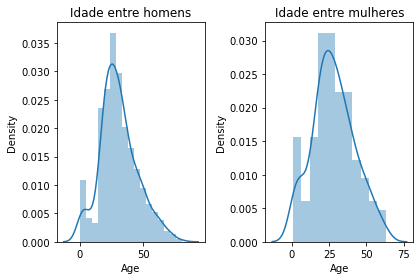

In [140]:
import matplotlib.pyplot as plt
plt.figure()
plt.subplot(1,2,1)
sea.distplot(treino.loc[treino['Sex'] == 'male'].Age).set_title("Idade entre homens")
plt.subplot(1,2,2)
sea.distplot(treino.loc[treino['Sex'] == 'female'].Age).set_title("Idade entre mulheres")
plt.tight_layout()

In [143]:
mulher = treino['Sex'] == 'female'
mulher = treino[mulher]

In [169]:
from mpl_toolkits.mplot3d import axes3d

Text(0.5, 0, 'Pclass')

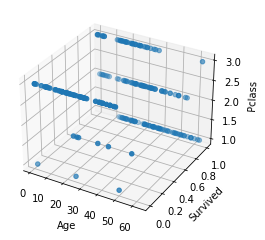

In [171]:
figura = plt.figure()
eixo = figura.add_subplot(1,1,1, projection = '3d')
eixo.scatter(mulher.Age, mulher.Survived, mulher.Pclass)
eixo.set_xlabel("Age")
eixo.set_ylabel("Survived")
eixo.set_zlabel("Pclass")

##MANIPULANDO AS CABINES##

In [5]:
agruparcabine = treino.groupby(["Cabin"]).size()
agruparcabine

Cabin
A10    1
A14    1
A16    1
A19    1
A20    1
      ..
F33    3
F38    1
F4     2
G6     4
T      1
Length: 147, dtype: int64

In [6]:
treino['Cabin'].value_counts()

B96 B98        4
C23 C25 C27    4
G6             4
F2             3
E101           3
              ..
D48            1
A24            1
B79            1
A23            1
F38            1
Name: Cabin, Length: 147, dtype: int64

In [7]:
cabine = treino["Cabin"]
cabine2 = teste['Cabin']

In [8]:
cabine = pd.DataFrame(cabine)
cabine2 = pd.DataFrame(cabine2)

In [88]:
cabine['Cabin'].fillna('C', inplace=True)
cabine2['Cabin'].fillna('C', inplace=True)

In [10]:
cabine["letras"] = cabine['Cabin'].str.slice(0,1)
cabine2["letras"] = cabine2['Cabin'].str.slice(0,1)

In [11]:
cabine.head()

,Cabin,letras
0,C,C
1,C85,C
2,C,C
3,C123,C
4,C,C


In [12]:
treino['cabine'] = cabine['letras']
teste["cabine"] = cabine2["letras"]

In [13]:
passengerid = teste['PassengerId']

In [14]:
treino = treino.drop(columns=['Cabin'])
treino = treino.drop(columns=['Name'])
treino = treino.drop(columns=['Ticket'])
treino = treino.drop(columns=['PassengerId'])

teste = teste.drop(columns=['Cabin'])
teste = teste.drop(columns=['Name'])
teste = teste.drop(columns=['Ticket'])
teste = teste.drop(columns=['PassengerId'])

In [15]:
mediana_treino_age = np.nanmean(treino['Age'])
mediana_treino_age

29.69911764705882

In [16]:
mediana_teste_age = np.nanmean(teste['Age'])
mediana_teste_age

30.272590361445783

In [83]:
treino.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,cabine_A,cabine_B,cabine_C,cabine_D,cabine_E,cabine_F,cabine_G,cabine_T
0,0,3,22.0,1,0,7.2500,0,1,0,0,1,0,0,1,0,0,0,0,0
1,1,1,38.0,1,0,71.2833,1,0,1,0,0,0,0,1,0,0,0,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1,0,0,1,0,0,0,0,0
3,1,1,35.0,1,0,53.1000,1,0,0,0,1,0,0,1,0,0,0,0,0
4,0,3,35.0,0,0,8.0500,0,1,0,0,1,0,0,1,0,0,0,0,0


In [85]:
treino.shape

(891, 19)

In [17]:
treino['Age'].fillna(mediana_treino_age, inplace=True)
teste['Age'].fillna(mediana_teste_age, inplace=True)

In [18]:
treino = pd.get_dummies(treino)
teste = pd.get_dummies(teste)

In [19]:
treino.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,cabine_A,cabine_B,cabine_C,cabine_D,cabine_E,cabine_F,cabine_G,cabine_T
0,0,3,22.0,1,0,7.2500,0,1,0,0,1,0,0,1,0,0,0,0,0
1,1,1,38.0,1,0,71.2833,1,0,1,0,0,0,0,1,0,0,0,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1,0,0,1,0,0,0,0,0
3,1,1,35.0,1,0,53.1000,1,0,0,0,1,0,0,1,0,0,0,0,0
4,0,3,35.0,0,0,8.0500,0,1,0,0,1,0,0,1,0,0,0,0,0


In [77]:
previsores_treino = treino.iloc[:,1:18].values
classe_treino = treino.iloc[:,0].values

In [78]:
x_treinamento, x_teste, y_treinamento, y_teste = train_test_split(previsores_treino,
                                                                 classe_treino,
                                                                 test_size=0.2,
                                                                 random_state=0)

In [79]:
floresta = RandomForestClassifier(n_estimators = 60)
floresta.fit(x_treinamento, y_treinamento)

RandomForestClassifier(n_estimators=50)

In [80]:
previsoes = floresta.predict(x_teste)
confusao = confusion_matrix(y_teste, previsoes)
confusao

array([[101,   9],
       [ 20,  49]], dtype=int64)

In [81]:
from sklearn.metrics import classification_report
print(classification_report(y_teste, previsoes))

              precision    recall  f1-score   support

           0       0.83      0.92      0.87       110
           1       0.84      0.71      0.77        69

    accuracy                           0.84       179
   macro avg       0.84      0.81      0.82       179
weighted avg       0.84      0.84      0.83       179



<AxesSubplot:>

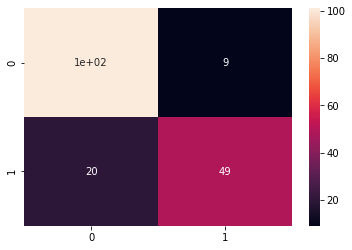

In [82]:
sea.heatmap(confusao, annot = True)

##APLICANDO AO TESTE##

In [26]:
teste['Fare'].isnull().sum()

1

In [27]:
mediana_fare = np.nanmean(teste['Fare'])
mediana_fare

35.627188489208635

In [28]:
teste.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,cabine_A,cabine_B,cabine_C,cabine_D,cabine_E,cabine_F,cabine_G
0,3,34.5,0,0,7.8292,0,1,0,1,0,0,0,1,0,0,0,0
1,3,47.0,1,0,7.0000,1,0,0,0,1,0,0,1,0,0,0,0
2,2,62.0,0,0,9.6875,0,1,0,1,0,0,0,1,0,0,0,0
3,3,27.0,0,0,8.6625,0,1,0,0,1,0,0,1,0,0,0,0
4,3,22.0,1,1,12.2875,1,0,0,0,1,0,0,1,0,0,0,0


In [29]:
teste['Fare'].fillna(mediana_fare, inplace=True)
teste = teste.values

In [30]:
predicao2 = floresta.predict(teste)

In [34]:
output = pd.DataFrame({'PassengerId': passengerid, 'Survived': predicao2})

In [36]:
output.head

<bound method NDFrame.head of      PassengerId  Survived
0            892         0
1            893         0
2            894         0
3            895         0
4            896         0
..           ...       ...
413         1305         0
414         1306         1
415         1307         0
416         1308         0
417         1309         1

[418 rows x 2 columns]>

In [40]:
output.to_csv('my_submission6.csv', index=False)

In [39]:
predicao2.shape

(418,)

In [33]:
passengerid.head

<bound method NDFrame.head of 0       892
1       893
2       894
3       895
4       896
       ... 
413    1305
414    1306
415    1307
416    1308
417    1309
Name: PassengerId, Length: 418, dtype: int64>